# **TP1 : gradient stochastique - MDI341**

## **Introduction :**

Le but de cette séance est la mise en œuvre d'algorithmes de type gradient stochastique (en anglais : Stochastic Gradient Descent, SGD). Dans un premier temps, afin de se familiariser avec le SGD, on va mettre en œuvre l'algorithme dans le cadre classique de la classification binaire. Un fichier Python est fourni (`SGD_classification.py`) pour guider les réponses, avec néanmoins
certaines parties manquantes qu'il faut compléter.

In [1]:
# -*- coding: utf-8 -*-
"""
@authors: salmon, gramfort, bellet
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

plt.close('all')


## **Exemple sur données synthétiques**

On pourra utiliser la fonction `stochastic_gradient` fournie dans `SGD_classification.py`.

### **Question 1 :** 
On considère ici la perte quadratique : $l(a, b) = \frac{(a − b)²}{2}$. Calculer $\frac{∂l}{∂x_1}(a,b)$. Par convention, $x_1$ correspond à la première variable donc ici à $a$.

> On calcule à la main et on obtient facilement $\frac{∂l}{∂x_1}(a,b) = a - b$.

### **Question 2 :**
Implémenter l'algorithme SGD avec le choix d'un pas constant $γ$ et d'un nombre d'itérations $T$ permettant de minimiser le critère et d'aboutir à une solution correcte.

In [51]:
############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
        
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx])  # QUESTION 2 conformément à la formule fournie en préambule dans l'énoncé.
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            raise NotImplementedError('QUESTION 6')
        
        
        all_w[t] = w
    return w, all_w, pobj

### **Question 3 :**

Prendre comme modèle "jouet" : $n$ vecteurs $(x_i)_{1≤i≤n}$ de $\mathbb{R}^p$ tirés de manière i.i.d selon une loi gaussienne, centrée réduite (prendre $n = 1000$, $p = 100$) ainsi que $n$ réels $(\epsilon_i)_{1≤i≤n}$ tirés de manière *i.i.d* selon une loi gaussienne, centrée réduite.

In [52]:
###############################################################################
#            Toy dataset
###############################################################################

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations

# A utiliser pour le choix d'un pas constant
gamma = 0.1  # suggested step size, 

# A utiliser pour le choix d'un pas variable
#def gamma(t): 
 #   return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'
# loss = 'hinge'  # QUESTION 4


### **Question 4 :**
Afficher l'évolution de la valeur de l'objectif en fonction du nombre d'itérations (voir enoncé du sujet pour précisions).

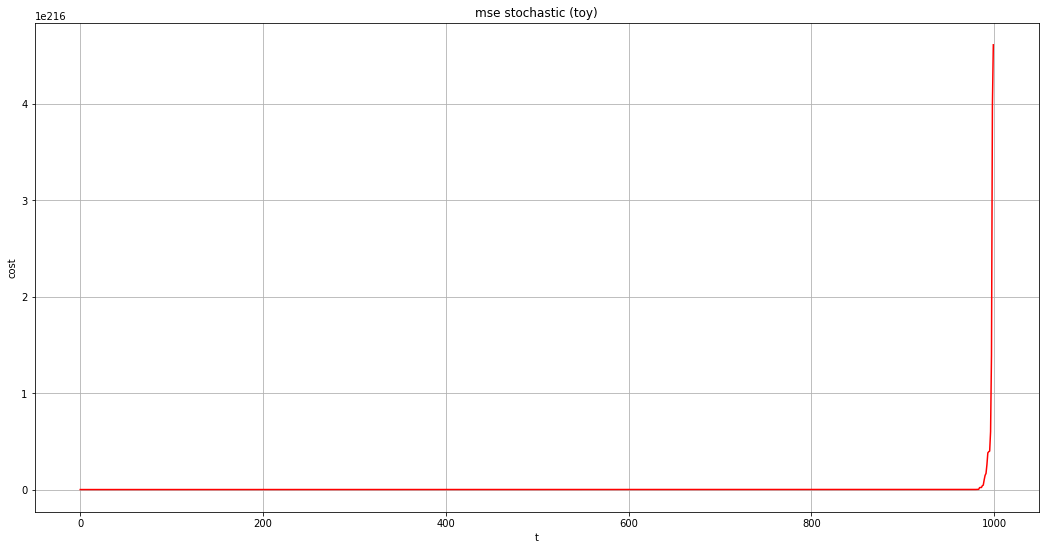

In [53]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure(figsize=(18,9))
plt.plot(pobj, color='red')
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.grid(True)
plt.show()


In [46]:
pobj[n_iter-1] #on récupère la plus petite valeur de notre mse, c'est à dire la dernière valeur sur le nombre d'itérations

1.8615240374487239

In [47]:
gamma_func(1000)

0.0009090909090909091

In [48]:
gamma(1000)

0.0009090909090909091